In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

%matplotlib inline


In [133]:
eventos = pd.read_csv('/home/victoriax/Downloads/fiuba-trocafone-tp1-final-set/events.csv',low_memory = False)
eventos.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
eventos.index

RangeIndex(start=0, stop=1011288, step=1)

In [135]:
eventos_columnas = eventos.columns
eventos_columnas

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [136]:
eventos.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

In [137]:
eventos['timestamp'].value_counts().head()

2018-05-15 15:56:06    11
2018-05-31 21:10:29     9
2018-06-11 17:09:47     9
2018-05-30 16:50:15     9
2018-06-05 14:23:13     9
Name: timestamp, dtype: int64

In [138]:
eventos['timestamp'].head()

0    2018-05-31 23:38:05
1    2018-05-31 23:38:05
2    2018-05-31 23:38:09
3    2018-05-31 23:38:40
4    2018-05-29 13:29:25
Name: timestamp, dtype: object

In [139]:
eventos['person'].value_counts()

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
d9251b63    1234
c501ff3a    1201
778fcfbd    1195
a7d3181e    1185
e2b0ce1b    1168
c38d5de3    1162
6d2fe2db    1110
88cabe99    1073
ba102035    1014
ff9dc4b8    1005
b7db0194    1003
a94ab0df     990
e27ec493     978
55d9fd71     973
8e0c69f6     958
63112254     955
d5661793     950
badaab79     930
3444791f     913
9fdfd942     907
            ... 
aa9e5dd3       1
f4b8f9af       1
19b85921       1
3ff2fb36       1
c6f188f8       1
f42d08e4       1
fc8374e1       1
52cef90e       1
9fb1d0a7       1
4d5c3c8c       1
4a436766       1
97c7a7ad       1
99f9b2e4       1
7dd7b2be       1
e5850292       1
d6dee1e3       1
58f403bd       1
e9c86ccb       1
b1453674       1
4e901fbe       1
b470dfad       1
157704b2       1
6d8a8a1f       1
4e45c3d0       1
6b496a9d       1
873c3090       1
777dc456       1
0f54a4a6      

In [140]:
eventos['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

Analisis: horario del dia en el cual se realizan miran mas productos 

In [141]:
eventos['timestamp'] = pd.to_datetime(eventos['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
eventos

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0


In [142]:
eventos_horas = eventos['timestamp'].dt.hour
eventos_horas.head()


0    23
1    23
2    23
3    23
4    13
Name: timestamp, dtype: int64

In [143]:
counts=eventos_horas.value_counts().sort_index()
counts

0     64378
1     58978
2     48536
3     33118
4     18838
5     11335
6      6257
7      3910
8      4623
9      8077
10    16639
11    32884
12    47426
13    55684
14    60211
15    58852
16    64637
17    60560
18    57614
19    58398
20    56378
21    58867
22    59412
23    65676
Name: timestamp, dtype: int64

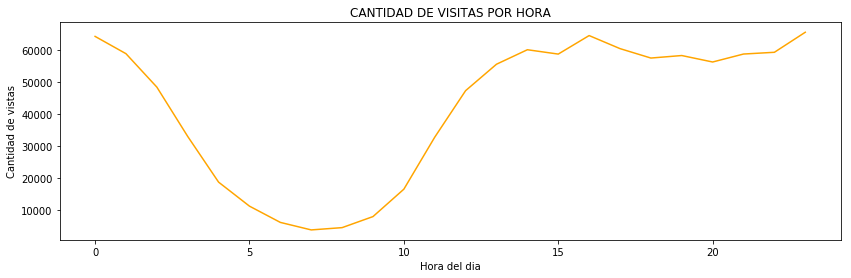

In [144]:
#Graficamos las cantidad de visitas a lo largo del dia
counts.plot(figsize=(14,4),title='CANTIDAD DE VISITAS POR HORA', color = 'orange');
ax=plt.gca()
ax.set_ylabel('Cantidad de vistas')
ax.set_xlabel('Hora del dia')
plt.show()


Analisis 2: Cantidad de personas que realizaron un evento

In [146]:
eventos_redu = eventos[['person','event']]
eventos_redu.head(10)


,person,event
0,0004b0a2,ad campaign hit
1,0004b0a2,visited site
2,0004b0a2,viewed product
3,0004b0a2,checkout
4,0006a21a,viewed product
5,0006a21a,visited site
6,0006a21a,ad campaign hit
7,0006a21a,checkout
8,000a54b2,generic listing
9,000a54b2,visited site


In [147]:
sin_duplicados = eventos_redu.drop_duplicates()

In [148]:
aux = sin_duplicados['event'].value_counts()
aux

checkout             27624
visited site         26899
viewed product       26316
ad campaign hit      21312
search engine hit    17205
generic listing      15404
brand listing        10821
searched products     7420
staticpage            1475
conversion             716
lead                   291
Name: event, dtype: int64

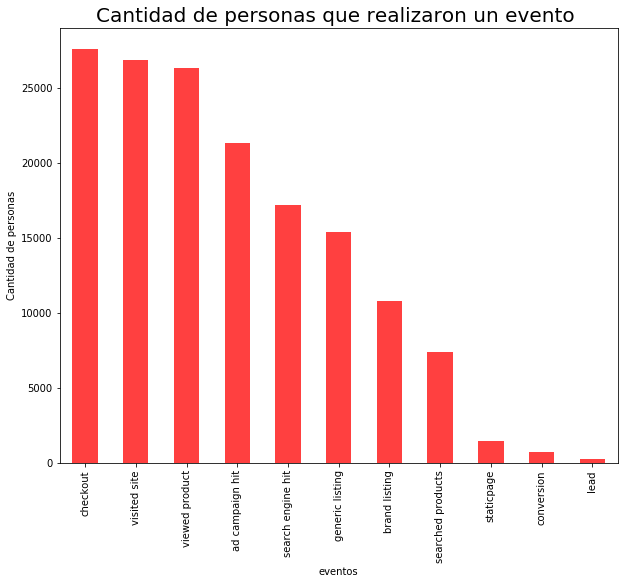

In [149]:
final_merge_plot = plt.figure()

plt.title ('Cantidad de personas que realizaron un evento ',color='black', size = 20)

ax = aux.plot(kind='bar', stacked=True, figsize=(10,8) ,alpha=0.75, color='red')


ax.set_ylabel('Cantidad de personas')
ax.set_xlabel("eventos")
plt.show()

Analisis: Productos Mas visitados por las personas

In [150]:
eventos_aux = eventos[['person','model']]
eventos_aux.head()

,person,model
0,0004b0a2,NaN
1,0004b0a2,NaN
2,0004b0a2,iPhone 5s
3,0004b0a2,iPhone 5s
4,0006a21a,Samsung Galaxy S8


In [151]:
eventos_aux.isnull().values.any()

True

In [152]:
sin_na = eventos_aux.dropna(subset=['model'])
sin_na.head()

,person,model
2,0004b0a2,iPhone 5s
3,0004b0a2,iPhone 5s
4,0006a21a,Samsung Galaxy S8
7,0006a21a,Samsung Galaxy S8
13,000a54b2,Motorola Moto Z Play


In [153]:
sin_na.isnull().values.any()

False

In [154]:
sin_na['model'].value_counts().head(10)

iPhone 6                  50916
iPhone 5s                 44878
iPhone 6S                 39296
iPhone 7                  27556
Samsung Galaxy S7 Edge    23926
Samsung Galaxy S7         19337
iPhone 7 Plus             18792
Samsung Galaxy S8         16959
iPhone SE                 16531
Samsung Galaxy J5         13044
Name: model, dtype: int64

In [155]:
sin_na['model'].describe()

count       564284
unique         202
top       iPhone 6
freq         50916
Name: model, dtype: object

In [156]:
sin_na['person'].describe()

count       564284
unique       27622
top       2d5a84c1
freq          1528
Name: person, dtype: object

In [157]:
aux2=sin_na.drop_duplicates()


In [158]:
aux2['person'].describe()

count       113607
unique       27622
top       71492f2b
freq           119
Name: person, dtype: object

In [159]:
for_plt=aux2['model'].value_counts().head(10)
for_plt

iPhone 6                  6301
iPhone 5s                 5335
iPhone 6S                 5023
iPhone 7                  3755
Samsung Galaxy S7         3522
Samsung Galaxy J5         3204
Samsung Galaxy S8         3153
iPhone 7 Plus             2904
Samsung Galaxy S7 Edge    2760
Samsung Galaxy S6 Flat    2568
Name: model, dtype: int64

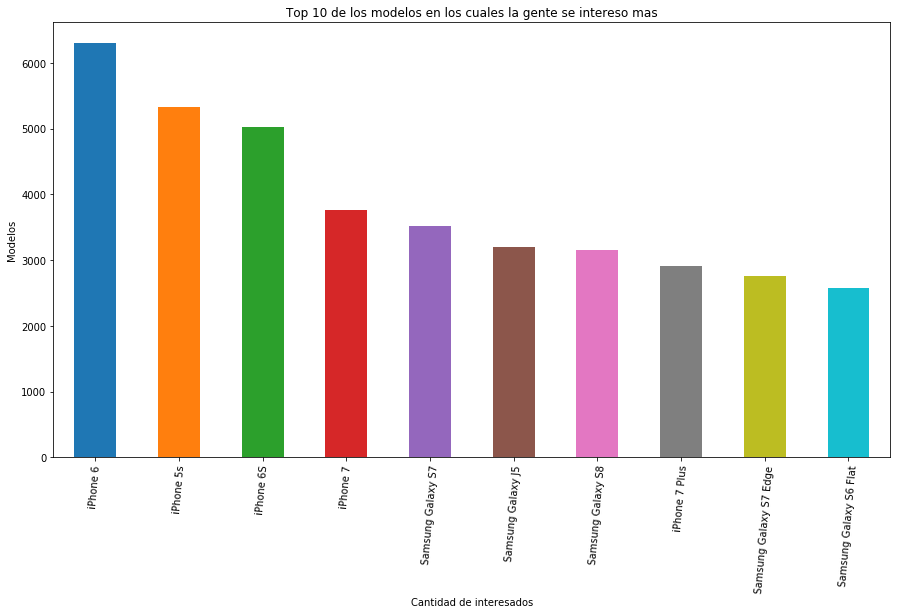

In [219]:

for_plt.plot(kind='bar',figsize=(15,8),rot=85,title='Top 10 de los modelos en los cuales la gente se intereso mas');
ax=plt.gca()
ax.set_ylabel('Modelos')
ax.set_xlabel('Cantidad de interesados')
plt.show()

Analisis: Interes en telefonos segun capacidad de memoria 

In [189]:
eventos_memoria = eventos[['person','model','storage','event','sku']]
reducido  = eventos_memoria.dropna()
reducido.head()

,person,model,storage,event,sku
2,0004b0a2,iPhone 5s,32GB,viewed product,2694.0
3,0004b0a2,iPhone 5s,32GB,checkout,2694.0
4,0006a21a,Samsung Galaxy S8,64GB,viewed product,15338.0
7,0006a21a,Samsung Galaxy S8,64GB,checkout,15338.0
13,000a54b2,Motorola Moto Z Play,32GB,viewed product,12661.0


In [190]:
reducido['event'].value_counts()

viewed product    528931
checkout           33733
conversion          1172
Name: event, dtype: int64

In [191]:
sin_duplicados = reducido.drop_duplicates()
sin_duplicados.head()

,person,model,storage,event,sku
2,0004b0a2,iPhone 5s,32GB,viewed product,2694.0
3,0004b0a2,iPhone 5s,32GB,checkout,2694.0
4,0006a21a,Samsung Galaxy S8,64GB,viewed product,15338.0
7,0006a21a,Samsung Galaxy S8,64GB,checkout,15338.0
13,000a54b2,Motorola Moto Z Play,32GB,viewed product,12661.0


In [192]:
sin_duplicados['event'].value_counts()

viewed product    295854
checkout           31299
conversion           904
Name: event, dtype: int64

In [193]:
productos_vistos = sin_duplicados[sin_duplicados['event'] == 'viewed product']
productos_vistos.head()

,person,model,storage,event,sku
2,0004b0a2,iPhone 5s,32GB,viewed product,2694.0
4,0006a21a,Samsung Galaxy S8,64GB,viewed product,15338.0
13,000a54b2,Motorola Moto Z Play,32GB,viewed product,12661.0
22,000a54b2,iPhone 7 Plus,256GB,viewed product,10254.0
26,000a54b2,iPhone 6S,16GB,viewed product,6581.0


In [194]:
fin1 = productos_vistos['storage'].value_counts()
fin1.sort_index()
df1 =fin1.to_frame()
df1=df1.reset_index()
df1.columns = ['index','productos que fueron vistos']



In [195]:
productos_checked = sin_duplicados [sin_duplicados ['event'] == 'checkout']
productos_checked

,person,model,storage,event,sku
3,0004b0a2,iPhone 5s,32GB,checkout,2694.0
7,0006a21a,Samsung Galaxy S8,64GB,checkout,15338.0
44,000a54b2,Motorola Moto Z Play,32GB,checkout,12660.0
85,00184bf9,Samsung Galaxy J5,16GB,checkout,6355.0
94,00184bf9,iPhone 5c,16GB,checkout,213.0
95,00184bf9,iPhone 5c,8GB,checkout,3649.0
103,0019c395,Samsung Galaxy J5,16GB,checkout,6356.0
110,001bb7eb,iPhone 6,128GB,checkout,2836.0
114,001f1653,Samsung Galaxy S6 Flat,32GB,checkout,3359.0
137,00204059,iPhone 5s,16GB,checkout,2699.0


In [196]:
fin2 = productos_checked['storage'].value_counts().sort_index()
df2=fin2.to_frame()


df2=df2.reset_index()
df2.columns=['index','productos que fueron checkout']
df2

,index,productos que fueron checkout
0,128GB,1753
1,16GB,11377
2,256GB,258
3,32GB,9058
4,4GB,278
5,512MB,59
6,64GB,5146
7,8GB,3370


In [197]:
resultado = df1.merge(df2,on = 'index')
resultado

,index,productos que fueron vistos,productos que fueron checkout
0,16GB,99007,11377
1,32GB,94223,9058
2,64GB,52530,5146
3,128GB,22568,1753
4,8GB,21275,3370
5,256GB,4593,258
6,4GB,1275,278
7,512MB,383,59


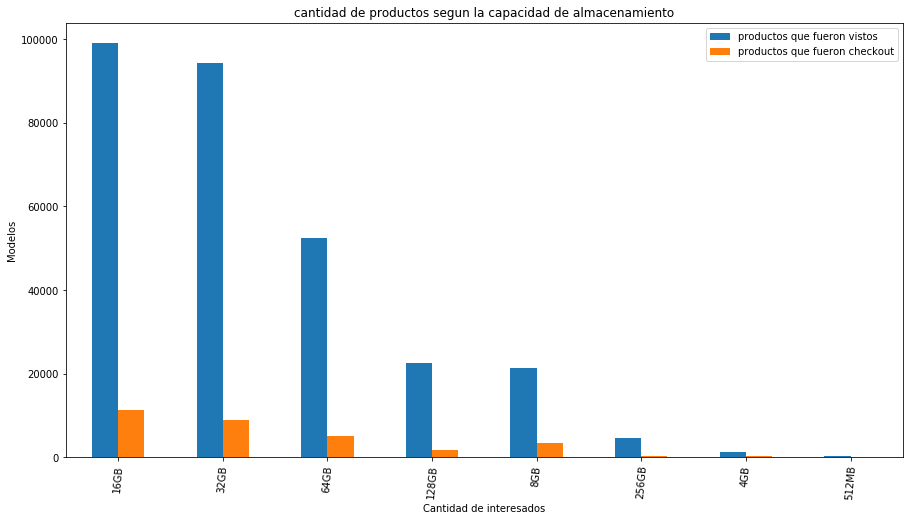

In [198]:
resultado.plot(kind='bar',x = 'index',figsize=(15,8),rot=85,title='cantidad de productos segun la capacidad de almacenamiento');

ax=plt.gca()
ax.set_ylabel('Modelos')
ax.set_xlabel('Cantidad de interesados')
plt.show()

Analisis: personas segun su lugar

In [169]:
eventos_pais = eventos[['person','country']]
eventos_pais.head()

,person,country
0,0004b0a2,NaN
1,0004b0a2,Brazil
2,0004b0a2,NaN
3,0004b0a2,NaN
4,0006a21a,NaN


In [170]:
eventos_pais.describe()

,person,country
count,1011288,87378
unique,27624,46
top,71492f2b,Brazil
freq,2771,84308


In [171]:
eventos.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3574,202,5,8,63,35310,...,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4282,50916,243014,190833,132960,594,...,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611
first,2018-01-01 07:32:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-06-15 23:59:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
aux = eventos_pais.dropna()
aux = aux.drop_duplicates()
aux = aux[aux['country'] != 'Unknown']
final = aux['country'].value_counts().head(5)
final

Brazil           25872
United States      322
Argentina           25
Canada              20
Netherlands         10
Name: country, dtype: int64

Text(0,0.5,'Nacionalidad')

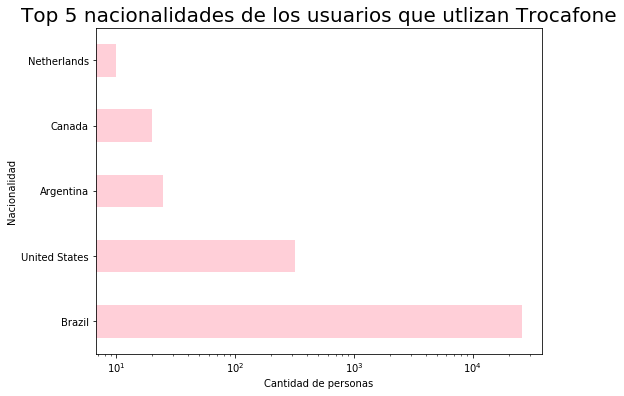

In [174]:
fig = plt.figure()

plt.title ('Top 5 nacionalidades de los usuarios que utlizan Trocafone',color='black', size = 20)

ap1 =final.plot(kind='barh', stacked=True, figsize=(8,6) ,alpha=0.75, color='pink', logx=True)


ap1.set_xlabel('Cantidad de personas')
ap1.set_ylabel("Nacionalidad")

Analisis: Top 10 Cantidad de personas que entran a la pagina utilizando cierto dispositivo 

In [205]:
tipo_dispositivo = eventos[['person','operating_system_version']]
tipo_dispositivo.head()


,person,operating_system_version
0,0004b0a2,NaN
1,0004b0a2,Android 6
2,0004b0a2,NaN
3,0004b0a2,NaN
4,0006a21a,NaN


In [206]:
tipo_dispositivo['operating_system_version'].value_counts()

Windows 7             19675
Windows 10            17110
Android 7              9964
Android 6.0.1          7805
Android 6              6871
Android 5.1.1          4123
Android 7.1.1          3325
Windows 8.1            2781
Android 5.0.2          1640
Android 4.4.2          1402
iOS 11.3               1345
Android 4.4.4          1288
Android 5.1            1269
Android 8               973
Android 5.0.1           746
iOS 10.3.3              738
Windows 8               732
Windows XP              613
Android 4.2.2           566
Android 4.1.2           519
Android 5               321
Android 4.3             318
Linux                   293
iOS 11.2.6              286
iOS 9.3.5               268
Windows Phone 10        252
iOS 11.4                231
Windows Phone 8.1       200
iOS 11.2.5              147
Android 7.1.2           141
                      ...  
Mac OS X 10.12.3          2
Android 3.1               2
Mac OS X 10.11.3          2
Ubuntu 10.4               2
Mac OS X 10.6       

In [207]:
tipo_dispositivo=tipo_dispositivo.dropna()

In [215]:
tipo_dispositivo= tipo_dispositivo.drop_duplicates()

In [218]:
result=tipo_dispositivo['operating_system_version'].value_counts().head(10)

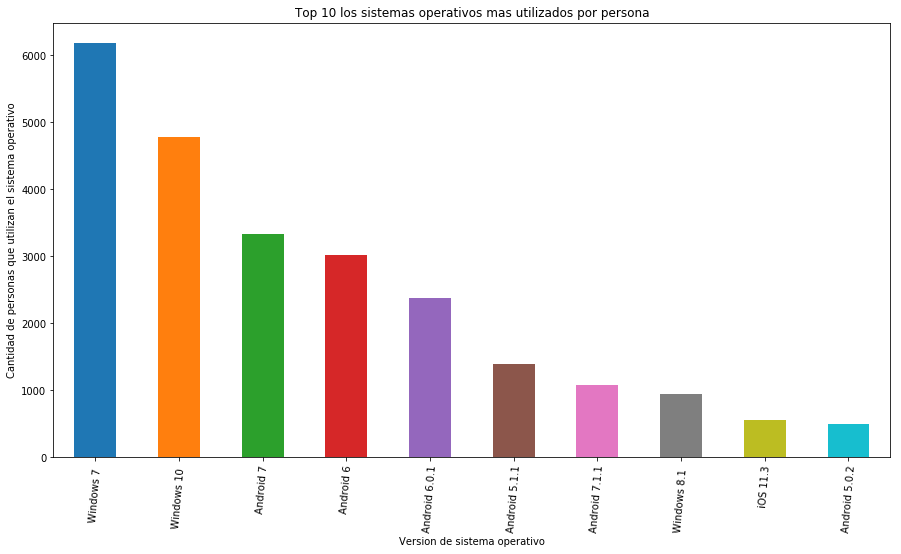

In [224]:
result.plot(kind='bar',figsize=(15,8),rot=85,title='Top 10 los sistemas operativos mas utilizados por persona');
ax=plt.gca()
ax.set_ylabel('Cantidad de personas que utilizan el sistema operativo')
ax.set_xlabel('Version de sistema operativo')
plt.show()